In [93]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import re

In [94]:
#reading the file
df = pd.read_csv('Hotel Reservations.csv')

In [95]:
# head and description of the file
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [96]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [98]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [99]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [100]:
#droping Booking_ID
df = df.drop('Booking_ID' , axis = 1)

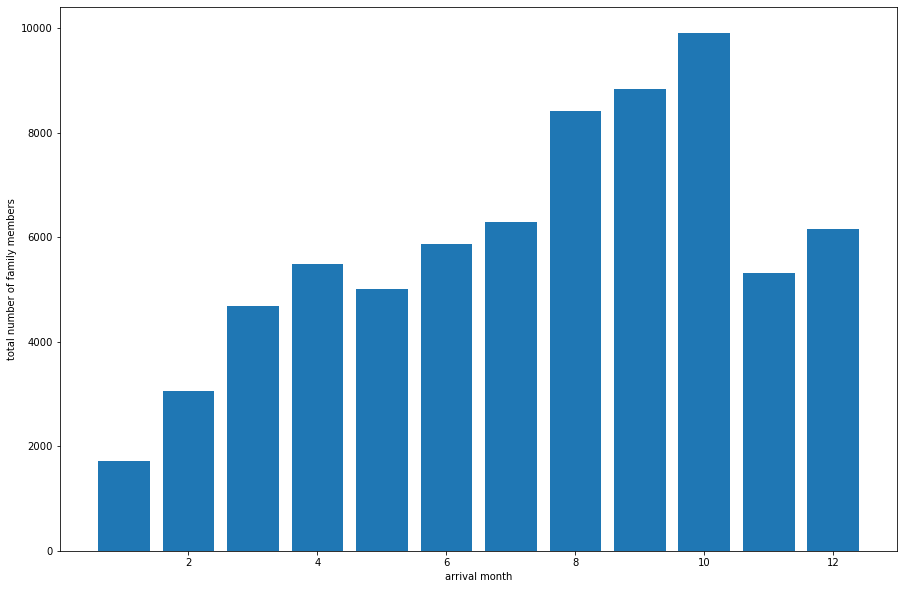

In [101]:
plt.figure(figsize = (15,10))
new = df.groupby('arrival_month')[['no_of_children', 'no_of_adults']].sum()
new['total_no'] = new['no_of_children'] + new['no_of_adults']
plt.bar(new.index, new['total_no'])
plt.xlabel('arrival month')
plt.ylabel('total number of family members');

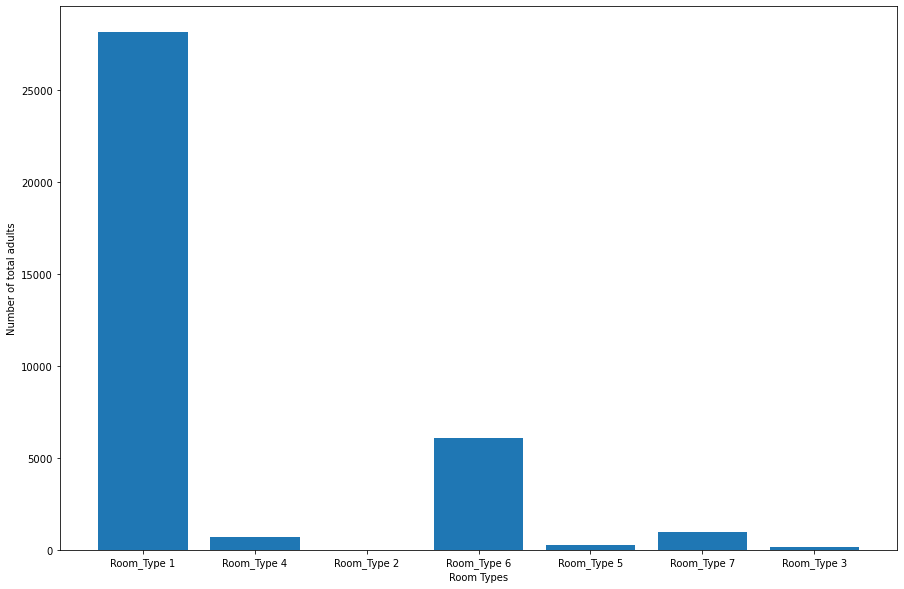

In [102]:
plt.figure(figsize = (15,10))
plt.bar(df['room_type_reserved'].unique(),df.groupby('room_type_reserved')['no_of_adults'].count())
plt.xlabel('Room Types')
plt.ylabel('Number of total adults');

In [103]:
#striping and converting room_type_reserved and type_of_meal_plan to int from object
df['room_type_reserved'] = df['room_type_reserved'].apply(lambda x: re.sub(r"[a-zA-Z_]" , "" , x))
df['room_type_reserved'] = df['room_type_reserved'].astype(int)

In [104]:
df = df.replace('Not Selected' , '0')

In [105]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].apply(lambda x: re.sub(r"[a-zA-Z]" , "" , x))
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype(int)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,0,1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,0,0,1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,1,0,1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,1,0,1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,0,0,1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [106]:
#seperating numerical and categorical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int32' , 'int64']]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [107]:
numerical_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests']

In [108]:
categorical_cols

['market_segment_type', 'booking_status']

In [109]:
#booking_status is the label column
categorical_cols.remove('booking_status')

In [110]:
#making pipelines
numerical_preprocessor = Pipeline(steps = [
    ('scaler' , StandardScaler())
])
categorical_preprocessor = Pipeline(steps = [
    ('onehot' , OneHotEncoder(handle_unknown = 'ignore'))
])
preprocessor = ColumnTransformer([
    ('numerical' , numerical_preprocessor , numerical_cols),
    ('categorical' , categorical_preprocessor , categorical_cols)
])
pipe = Pipeline(steps = [
    ('preprocessor' , preprocessor),
    ('classifier' , RandomForestClassifier())
])

In [111]:
X = df[numerical_cols + categorical_cols]
y = df['booking_status']

In [112]:
lab_encoder = LabelEncoder()
y = lab_encoder.fit_transform(y)
y

array([1, 1, 0, ..., 1, 0, 1])

In [113]:
#spliting data into train and test set
X_train, X_test, y_train , y_test = train_test_split(X , y , train_size = 0.75, random_state = 1)

In [114]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
               

In [115]:
print(pipe.score(X_test , y_test))

0.8890726651229462


In [81]:
#The accuracy of the RandomForestClassifier is 88.90%